In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


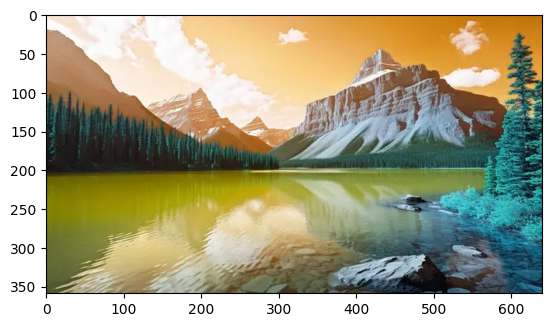

In [7]:
# Read the input image
image = cv2.imread('Mountain.jpg')
plt.imshow(image)
plt.show()

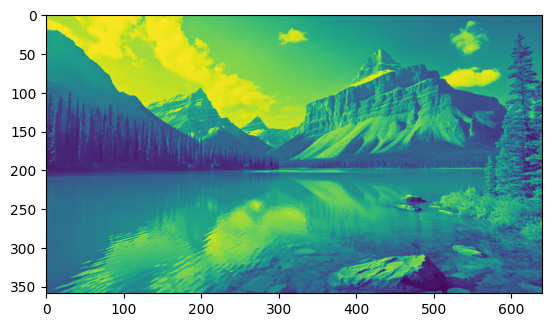

In [8]:
# Convert the input image into gray image
image = cv2.imread('Mountain.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

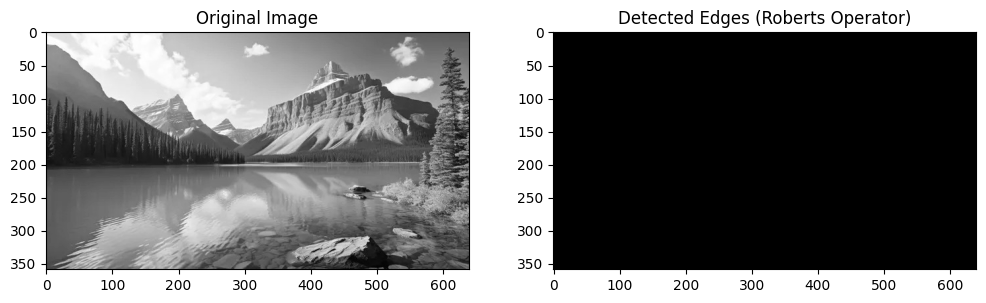

In [9]:


# Define Roberts kernels
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Apply Roberts operator for edge detection
roberts_x_output = cv2.filter2D(image, -1, roberts_x)
roberts_y_output = cv2.filter2D(image, -1, roberts_y)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(roberts_x_output**2 + roberts_y_output**2)

# Thresholding to detect edges
threshold = 100
edges = np.where(gradient_magnitude > threshold, 255, 0).astype(np.uint8)

# Display the original image and detected edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges (Roberts Operator)')
plt.show()


In [ ]:
# Apply Sobel operator for edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
# sobel_x for horizontal,
# Sobel operator, using floating-point numbers helps to preserve gradient information accurately during the computation of derivatives 
# 1 The order of the derivative in the x direction (horizontal). This parameter specifies that we want to compute the first-order derivative (gradient) in the x direction.
# 0 The order of the derivative in the y direction (vertical). This parameter specifies that we do not want to compute the derivative in the y direction.
# ksize=3, the size of the Sobel kernel. Here, ksize=3 specifies a 3x3 Sobel kernel

sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# image: The input grayscale image.
# cv2.CV_64F: The desired depth of the output image.
# 0: The order of the derivative in the x direction (horizontal). This parameter specifies that we do not want to compute the derivative in the x direction.
# 1: The order of the derivative in the y direction (vertical). This parameter specifies that we want to compute the first-order derivative (gradient) in the y direction.
# ksize=3: The size of the Sobel kernel


In [ ]:
# Compute the gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)



In [ ]:
# Thresholding to detect edges
threshold = 100
edges = (gradient_magnitude > threshold).astype(np.uint8) * 255

# Display the original image and detected edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.show()